UTS Machine Learning.

---


Nama: Sabilly Artowibowo

Nim: 1103204057

Model: Linear Regression

Dataset: Automobile.csv

Dataset Source: https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset/versions/1?resource=download

REGRESI LINEAR.

Regresi linear adalah teknik analisis statistik yang digunakan untuk memprediksi nilai variabel dependen (variabel respon) berdasarkan nilai variabel independen (variabel prediktor). Ini dilakukan dengan memodelkan hubungan antara variabel dependen dan independen dalam bentuk persamaan linier.

Tujuan dari pemodelan regresi adalah untuk mendapatkan estimasi parameter (koefisien) model regresi. Model regresi dapat digunakan untuk eksplanatori maupun prediksi.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Penjelasan:

---
1. kode diatas digunakan untuk menghubungkan google drive dengan google colab


PROMPT: Berikan kode untuk membaca file google drive lalu buat dataframenya.

In [2]:
import pandas as pd

file_path = "/content/drive/My Drive/Dataset/Automobile.csv"

df = pd.read_csv(file_path)

Penjelasan:

---
1. import library pandas untuk membaca file csv di google drive.
2. file_path: lokasi dimana file kita beraada.
3. membuat dataframe 'df' lalu memerintahkan program untuk membaca file csv.


EDA (Exploratory Data Analysis)

adalah metode yang digunakan oleh ilmuwan data untuk menganalisis dan menyelidiki set data dan merangkum karakteristik utamanya, sering kali menggunakan metode visualisasi data.

PROMPT: berikan kode yang biasanya digunakan di EDA

In [3]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


Penjelasan:

---
1. df.head(): merupakan cara untuk melihat 5 data teratas dari dataset kita.


Bagaimana jika kita ingin melihat (misal) 15 data teratas?

Gunakan perintah df.head(15) berarti program akan menampilkan indeks ke-0 sampai ke-14.

In [4]:
df.head(15)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,usa
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,usa


PROMPT: Menampilkan Informasi dari dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Penjelasan:

---
1. df.info(): untuk melihat informasi dari dataset kita.
2. informasi terdiri dari rangeindex, data columns, non-Null count, data types.


Melakukan statistika deskriptif dari dataset.

In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Penjelasan:

---
1. df.describe(): digunakan untuk melakukan statistika deskriptif yang berisi total jumlah, mean, std, nilai min, nilai maks, kuartil 1-3.


Sebelum kita melakukan perhitungan atau analisis menggunakan dataset, kita harus melihat apakah ada data yang NULL/ NaN. Data Null merupakan data yang tidak memiliki isi jadi tidak terbaca oleh program.

In [7]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Penjelasan:

---
1. df.isnull().sum(): dilakukan untuk melihat berapa banyak data yang NULL.
2. terihat bahwa hanya kolom horsepower yang memiliki nilai null sebanyak 6.


Visualisasi Data (Data Visualization)

---



Visualisasi data adalah representasi grafis dari informasi dan data. Dengan menggunakan elemen visual seperti grafik, diagram, dan peta, alat visualisasi data menyediakan cara yang mudah diakses untuk melihat dan memahami tren, pencilan, dan pola dalam data

Jangan lupa untuk mengimport library matplot untuk melakukan visualiasi. Matplotlib.pyplot adalah antarmuka berbasis state untuk matplotlib yang menyediakan cara implisit, seperti MATLAB, untuk melakukan plotting

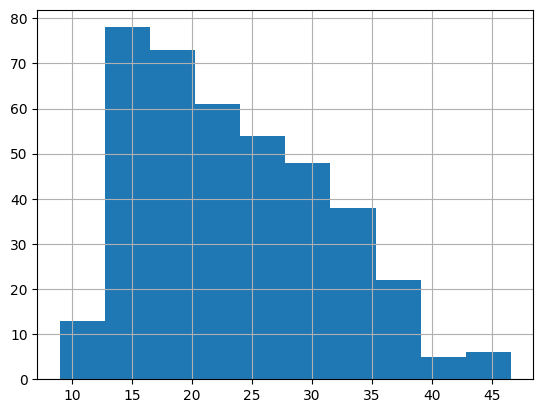

In [9]:
import matplotlib.pyplot as plt
df['mpg'].hist()
plt.show()

PROMPT: Berikan penjelasan tentang histogram

Penjelasan:

---
1. Histogram merupakan salah satu bentuk visualisasi data yang memeriksa distribusi data.
2. Terdapat banyak mobil yang berada di 15 mpg.


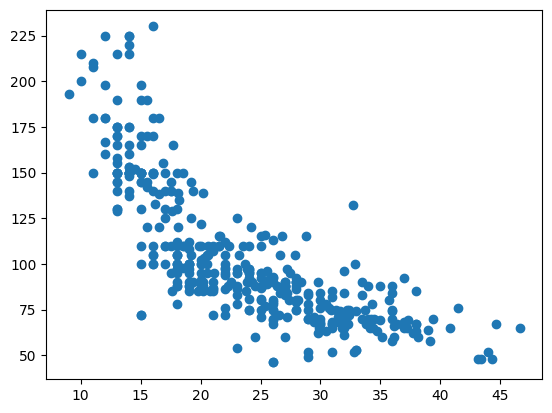

In [11]:
plt.scatter(df['mpg'], df['horsepower'])
plt.show()

PROMPT: scatter plot digunakan untuk apa

Penjelasan:

---
1. Scatter plot (juga dikenal sebagai scatter chart, scatter graph) menggunakan titik untuk mewakili nilai untuk dua variabel numerik yang berbeda. Posisi setiap titik pada sumbu horizontal dan vertikal menunjukkan nilai untuk setiap titik data2. Scatter plot digunakan untuk mengamati hubungan antara variabel.


Training the Data

---



Data pelatihan (training data) adalah kumpulan data awal yang digunakan untuk melatih algoritma pembelajaran mesin. Model menciptakan dan menyempurnakan aturannya menggunakan data ini. Ini adalah kumpulan sampel data yang digunakan untuk menyesuaikan parameter model pembelajaran mesin dengan melatihnya melalui contoh. Data pelatihan juga dikenal sebagai dataset pelatihan, set pembelajaran, dan set pelatihan

Sebelum training the data, kita harus melakukan pengisian data NULL. Dikarenakan pada training ini program tidak akan bisa membaca data NULL atau kosong.

PROMPT: berikan kode untuk mengisi nilai null dengan 0

In [12]:
df = df.fillna(0)

Penjelasan:

---
1. df=df.fillna(0): digunakan untuk mengisi nilai null atau kosong dengan angka 0.


In [13]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Penjelasan:

---
1. Data yang tadinya null atau kosong di kolom horsepower sudah terisi angka 0.


Setelahnya, kita akan memisahkan antara data train dan test. Maksud dari data train adalah data latih yang digunakan untuk membuat prediksi. Untuk data test yaitu data uji merupakan target dimana ini akan menjadi target dan data ini yang diprediksi.

PROMPT: berikan kode untuk melakukan train test split menggunakan data fitur : ['horsepower', 'weight'] dan data target :['acceleration']

In [14]:
from sklearn.model_selection import train_test_split

# Pilih fitur dan target
features = df[['horsepower', 'weight']]
target = df['acceleration']

# Lakukan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Sekarang X_train dan y_train berisi data pelatihan,
# dan X_test dan y_test berisi data pengujian.

Penjelasan:

---
1. import train_test_split module dari sklearn library, ini digunakan untuk menjalankan fitur spliting antara data training dan testing.
2. Pilih fitur yang diinginkan, untuk kasus ini saya ingin memprediksi akselerasi mobil berdasarkan horsepower (tenaga kuda) dan weight (berat). Maka fiturnya yaitu Horsepower dan Weight, lalu targetnya Acceleration.
3. Test size= 0.2 artinya 20% dari data akan digunakan untuk diuji dan sisanya untuk latih.
4. random state =42 digunakan untuk melihat konsistensi dari pembagian data di tiap running.


PROMPT: berikan kode untuk melakukan regresi linear dengan data train horsepower dan weight lalu data test acceleration dengan test size 0.2 dan random state 42

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

# Melakukan prediksi
y_pred = regressor.predict(X_test)

Penjelasan:

---
1. Jangan lupa untuk import LinearRegression Module dari sklearn.
2. membuat objek dari library sklearn yaitu linearregression
3. regressor.fit(X_train,y_train): melatih data dengan menggunakan regresi linear. X_train adalah adalah fitur dari data pelatihan dan y_train adalah target dari data pelatihan. Dalam konteks ini, fitur adalah ‘horsepower’ dan ‘weight’, dan target adalah ‘acceleration’. Metode fit menghitung koefisien optimal dari data pelatihan.
4. y_pred= regressor.predict(X_test): melakukan prediksi pada data uji (x_test).


Evaluating the Data.

---



PROMPT: pengertian dan tujuan evaluasi data machine learning

---



Evaluasi model dalam pembelajaran mesin adalah proses yang menggunakan beberapa metrik yang membantu kita menganalisis kinerja model.

Tujuannya: Menunjukkan dampak model, Meningkatkan pemahaman tentang model, dan Identifikasi algoritma pembelajaran mesin yang paling cocok.

PROMPT: jelaskan MSE MAE DAN RMSE

Evaluasi data yang sudah kita lakukan regresi diatas, dilakukan dengan melihat MAE, MSE dan RMSE.

Mean Squared Error (MSE): MSE adalah ukuran rata-rata dari kuadrat kesalahan. Kesalahan di sini adalah perbedaan antara nilai yang diprediksi dan nilai sebenarnya. MSE mengukur variasi data seputar garis regresi, yaitu, seberapa jauh titik data dari garis regresi. Nilai MSE yang lebih rendah menunjukkan bahwa model lebih akurat.

Mean Absolute Error (MAE): MAE adalah ukuran rata-rata dari kesalahan absolut antara nilai yang diprediksi dan nilai sebenarnya. Kesalahan absolut adalah perbedaan antara nilai yang diprediksi dan nilai sebenarnya, tanpa memperhatikan tanda. MAE memberikan ukuran seberapa dekat prediksi dengan nilai sebenarnya.

Root Mean Square Error (RMSE): RMSE adalah akar kuadrat dari MSE. Ini memberikan ukuran seberapa jauh titik data dari garis regresi. RMSE lebih peka terhadap kesalahan besar dibandingkan dengan MAE. Oleh karena itu, jika ada banyak nilai ekstrem, RMSE akan jauh lebih besar daripada MAE.

In [15]:
from sklearn import metrics
import numpy as np


In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2510043865727347
Mean Squared Error: 3.261523262191486
Root Mean Squared Error: 1.8059687877124249


Penjelasan:

---
 1. Mean Absolute Error (MAE): Dalam kasus ini, MAE adalah 1.2510043865727347, yang berarti rata-rata selisih antara nilai sebenarnya dan nilai prediksi adalah sekitar 1.25.

2. Mean Squared Error (MSE): Dalam kasus ini, MSE adalah 3.261523262191486, yang berarti rata-rata kuadrat selisih antara nilai sebenarnya dan nilai prediksi adalah sekitar 3.26.

3. Root Mean Squared Error (RMSE): Dalam kasus ini, RMSE adalah 1.8059687877124249, yang berarti rata-rata kesalahan prediksi adalah sekitar 1.81.
